In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from math import log2, ceil,floor
import os
from PIL import Image
import requests
from io import BytesIO
import random

In [2]:
I1 = np.array(mpimg.imread("first_frame.png"))
I2 = np.array(mpimg.imread("second_frame.png"))

In [3]:
I1.shape[1]

176

# 3 Step Search Implementation

In [4]:
def threestep(I1,I2,x,y):
    compar = I1[x:x+16 , y:y+16]
    MinError = 1e9+7
    for i in [4,0,-4]:
        for j in [4,0,-4]:
            if(x+i >=0 and x+16+i < I1.shape[0] and y+j >=0 and y+16+j < I1.shape[1] ):
                compar2 = I2[x+i:x+16+i , y+j:y+16+j]
                error = np.sum(np.abs(compar-compar2))/256
                if(error<MinError):
                        pos = np.array([i,j])
                        MinError = error
    MinError = 1e9+7
    x = x+pos[0]
    y = y+pos[1]
    for i in [2,0,-2]:
        for j in [2,0,-2]:
            if(x+i >=0 and x+16+i < I1.shape[0] and y+j >=0 and y+16+j < I1.shape[1] ):
                compar2 = I2[x+i:x+16+i , y+j:y+16+j]
                error = np.sum(np.abs(compar-compar2))/256
                if(error<MinError):
                        pos = np.array([i,j])
                        MinError = error
    x = x+pos[0]
    y = y+pos[1]
    MinError = 1e9+7
    for i in [1,0,-1]:
        for j in [1,0,-1]:
            if(x+i >=0 and x+16+i < I1.shape[0] and y+j >=0 and y+16+j < I1.shape[1] ):
                compar2 = I2[x+i:x+16+i , y+j:y+16+j]
                error = np.sum(np.abs(compar-compar2))/256
                if(error<MinError):
                        pos = np.array([i,j])
                        MinError = error
    x = x+pos[0]
    y = y+pos[1]
    
    return x,y

# Motion Vector Plot

In [5]:
D = {}
for i in range(0,I1.shape[0],16):
    for j in range(0,I1.shape[1],16):
        d1,d2 = threestep(I1,I2,i,j)
        d1 = d1-i
        d2 = d2-j
        D[(i,j)] = [d1,d2]

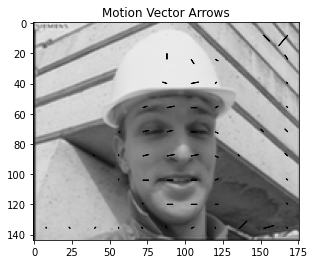

In [6]:
plt.title("Motion Vector Arrows")
plt.imshow(I1 ,cmap=plt.get_cmap('gray') )
for i in D:
    plt.arrow(i[1]+8,i[0]+8,D[i][1],D[i][0])

plt.show()

## Generating the motion compensated predicted frame using the motion vectors and the first frame.

In [7]:
I3 = np.ones(I1.shape) * -1
for i in range(0,I1.shape[0],16):
    for j in range(0,I1.shape[1],16):
        shift = D[(i,j)]
        xx = shift[0]
        yy = shift[1]
        I3[i+xx:i+16+xx , j+yy:j+16+yy] = I1[i:i+16 , j:j+16]
for i in range(I1.shape[0]):
    for j in range(I1.shape[1]):
        if(I3[i,j]==-1):
            I3[i,j] = I1[i,j]

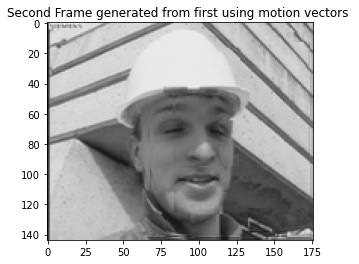

In [8]:
plt.title("Second Frame generated from first using motion vectors ")
plt.imshow(I3 ,cmap=plt.get_cmap('gray') )

# Error between the second frame and its motion compensated predicted version

In [9]:
error = np.mean(np.abs(I3-I2))

In [10]:
print("Mean Absolute Error Between Original and generated frame : " , error)

Mean Absolute Error Between Original and generated frame :  0.01512288966926398
